We first analyze businesses

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [10]:
# read business file
df = pd.read_json('data/yelp-dataset/yelp_academic_dataset_business.json', lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


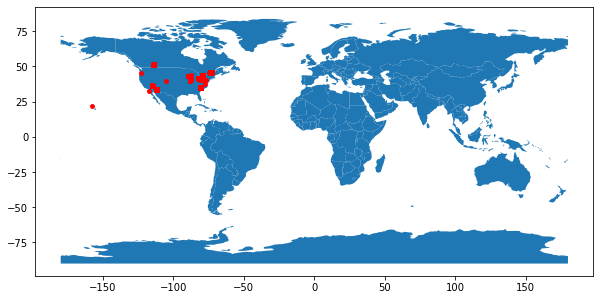

In [11]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

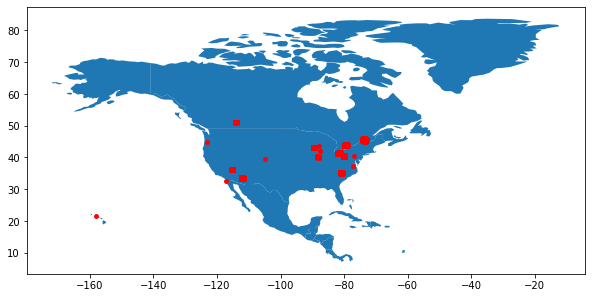

In [12]:
world = world[world.continent == 'North America']
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

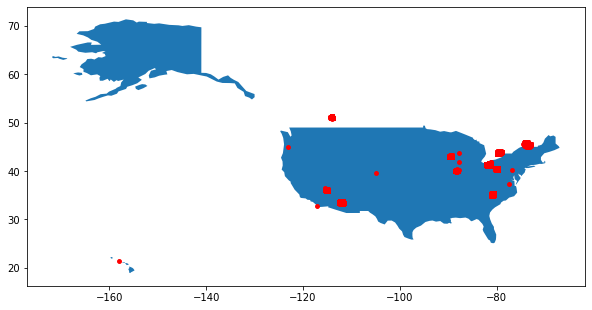

In [13]:
world = world[world.name == 'United States of America']
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [14]:
# show some statistics
df.describe()

,latitude,longitude,stars,review_count,is_open
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505,0.806632
std,4.940448,16.718535,1.023543,123.343597,0.394940
min,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,33.638658,-112.269476,3.000000,4.000000,1.000000
50%,36.147408,-111.743531,3.500000,9.000000,1.000000
75%,43.611693,-79.972679,4.500000,27.000000,1.000000
max,51.299943,-72.806550,5.000000,10129.000000,1.000000


In [15]:
# see columns, count of non-null rows and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   business_id   209393 non-null  object  
 1   name          209393 non-null  object  
 2   address       209393 non-null  object  
 3   city          209393 non-null  object  
 4   state         209393 non-null  object  
 5   postal_code   209393 non-null  object  
 6   latitude      209393 non-null  float64 
 7   longitude     209393 non-null  float64 
 8   stars         209393 non-null  float64 
 9   review_count  209393 non-null  int64   
 10  is_open       209393 non-null  int64   
 11  attributes    180348 non-null  object  
 12  categories    208869 non-null  object  
 13  hours         164550 non-null  object  
 14  geometry      209393 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(9)
memory usage: 24.0+ MB


There are 209393 rows (businesses). Atributes, categories and hours are not provided for some businesses

In [16]:
null_rows = df[df.isnull().any(axis=1)]
select_columns = ['business_id', 'name', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']
null_rows[select_columns].head(10)

,business_id,name,stars,review_count,is_open,attributes,categories,hours
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD",5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
10,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,5.0,3,1,None,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
16,uZuh51lXu7tsrC8RAwkg1A,Manolo Blahnik,4.5,32,0,"{'BusinessParking': '{'garage': True, 'street'...","Shopping, Shoe Stores, Fashion",None
17,nIEhsGbw0vJuYl05bzzj6Q,Bloom & Blueprint,4.5,7,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Event Planning & Services, Wedding Planning, F...",None
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",None
22,idgGrA8gt699JDUPKyiHJw,North Carolina Brewers And Music Festival,4.0,3,1,{'GoodForKids': 'True'},"Festivals, Arts & Entertainment",None
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",None
34,03x6ZlJ7s39DHqfTJU1Ecg,Beechmont Country Club,4.5,7,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Event Planning & Services, Venues & Event Spac...",None
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,2.5,15,0,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...","Mexican, Restaurants, Fast Food",None


Attributes, categories and hours are strings and null values cannot directly be filled with average statistics from other rows. 

In [17]:
# check examples of other columns
list_of_columns = df.columns.tolist()
print(list_of_columns)

['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'geometry']


In [18]:
df[list_of_columns[:-3]].head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '..."
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo..."


In [19]:
df.value_counts('city')

city
Las Vegas         31631
Toronto           20366
Phoenix           20171
Charlotte         10422
Scottsdale         9342
                  ...  
Queensville           1
Huntingdon            1
ROCKY RIVER           1
Rainbow Valley        1
​Gilbert              1
Length: 1251, dtype: int64

The majority of business are located in Las Vegas, Toronto, Phoenix, Charlotte, Scottsdale and cities like Queensville, Huntigdon, Rocky River, Rainbow Valley and Gilbert, among others have listed only 1 business each.

In [20]:
# stats for number of reviews
df.review_count.describe()

count    209393.000000
mean         36.937505
std         123.343597
min           3.000000
25%           4.000000
50%           9.000000
75%          27.000000
max       10129.000000
Name: review_count, dtype: float64

The minimum number of reviews for a business listed in the dataset is 3. 75% of the the businesses have received 27 reviews or less. That means very few businesses have received extremely high number of reviews thus skewing the mean, i.e., 36 reviews.

First we check how many businesses have fewer than 50 reviews out of the 209393 business.

In [21]:
df[df['review_count']<50].shape[0]

177451

177451 out of 209393 business have fewer than 50 reviews leaving 31942 with higher number of reviews than 50.

Now, let's 10 businesses with the least number of reviews.

In [22]:
df[['name', 'city', 'state', 'review_count', 'stars']].sort_values(by='review_count').head(10)

,name,city,state,review_count,stars
209392,Kudlow Ye,Toronto,ON,3,5.0
190418,241 Pizza,Scarborough,ON,3,3.5
75451,MAI Montreal Arts Interculturels,Montréal,QC,3,4.5
75454,Sachika,Montréal,QC,3,4.5
75461,Jungle Juice,Toronto,ON,3,3.5
190414,SAS Too,Phoenix,AZ,3,2.0
75467,Toepel Company,Mesa,AZ,3,5.0
75468,Baja Ready Mix,Phoenix,AZ,3,3.5
75471,F T Financial,Scottsdale,AZ,3,5.0
75476,Grand and Clover Cocktail Co.,Toronto,ON,3,5.0


And 10 businesses with the most number of reviews.

In [23]:
df[['name', 'city', 'state', 'review_count', 'stars']].sort_values(by='review_count', ascending=False).head(10)

,name,city,state,review_count,stars
81545,Bacchanal Buffet,Las Vegas,NV,10129,4.0
118008,Mon Ami Gabi,Las Vegas,NV,9264,4.0
147379,Wicked Spoon,Las Vegas,NV,7383,3.5
83020,Hash House A Go Go,Las Vegas,NV,6751,4.0
201975,Gordon Ramsay BurGR,Las Vegas,NV,5494,4.0
95962,Earl of Sandwich,Las Vegas,NV,5232,4.5
22754,Yardbird Southern Table & Bar,Las Vegas,NV,4828,4.5
145294,Secret Pizza,Las Vegas,NV,4803,4.0
205740,The Buffet At Wynn,Las Vegas,NV,4803,3.5
77432,The Cosmopolitan of Las Vegas,Las Vegas,NV,4740,4.0


Let's aggregate the number of reviews for each city.

We first list 20 cities with the smallest total reviews for the businesses located there.

In [24]:
grouped_review = df.groupby(['city']).agg({'review_count': ['sum','mean', 'min', 'max']})
grouped_review.columns = ['review_sum', 'review_mean', 'review_min', 'review_max']
grouped_review = grouped_review.reset_index()
grouped_review.sort_values(by='review_sum').head(20)


,city,review_sum,review_mean,review_min,review_max
553,McMasterville,3,3.0,3,3
1048,St-Laurent,3,3.0,3,3
1045,St-Jean Sur Richelieu,3,3.0,3,3
1044,St-Clet,3,3.0,3,3
316,Fountain Hls,3,3.0,3,3
167,Chateau,3,3.0,3,3
1029,South Heights,3,3.0,3,3
418,Joliet,3,3.0,3,3
1025,Somerton,3,3.0,3,3
1049,St-Lazare,3,3.0,3,3


We then list 20 cities with the highest total reviews for the businesses located there.

In [25]:
grouped_review.sort_values(by='review_sum').tail(20)


,city,review_sum,review_mean,review_min,review_max
521,Markham,59004,30.058074,3,638
705,North Las Vegas,60405,36.019678,3,815
599,Mississauga,65557,18.634736,3,1009
792,Peoria,69539,33.432212,3,713
135,Calgary,107106,12.785723,3,512
508,Madison,114475,31.065129,3,1879
341,Glendale,118096,30.882845,3,1075
182,Cleveland,129489,33.572466,3,1372
337,Gilbert,153826,41.075033,3,2369
626,Montréal,171059,24.510532,3,2667


Las Vegas, Toronto, Phoenix, Charlotte, and Scottsdale has higher total reviews than other cities which is understandable since there are more businesses in the dataset located in these locations, as shown above. Let's show a scatter plot of number of businesses and number of reviews for each city.

We first merged the two dataframes for number of total reviews and number of businesses.

In [26]:
grouped_business = df.value_counts('city').reset_index()
grouped_business.columns= ['city', 'num_businesses']
grouped_business

,city,num_businesses
0,Las Vegas,31631
1,Toronto,20366
2,Phoenix,20171
3,Charlotte,10422
4,Scottsdale,9342
...,...,...
1246,Queensville,1
1247,Huntingdon,1
1248,ROCKY RIVER,1
1249,Rainbow Valley,1


In [27]:
merged = pd.merge(grouped_review, grouped_business,on='city')
merged

,city,review_sum,review_mean,review_min,review_max,num_businesses
0,,7,3.5,3,4,2
1,110 Las Vegas,43,43.0,43,43,1
2,4321 W Flamingo Rd,292,292.0,292,292,1
3,ARSENAL,4,4.0,4,4,1
4,AZ,4,4.0,4,4,1
...,...,...,...,...,...,...
1246,toronto,24,8.0,3,11,3
1247,Île-Perrot,8,8.0,8,8,1
1248,Île-des-Soeurs,5,5.0,5,5,1
1249,​Avondale,5,5.0,5,5,1


We can now show the scatter plot.

<AxesSubplot:xlabel='review_sum', ylabel='num_businesses'>

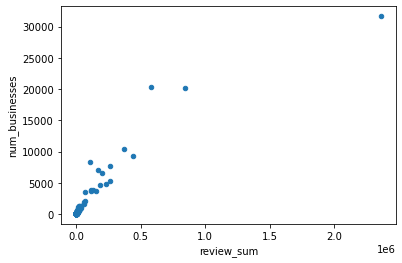

In [28]:
merged.plot(kind='scatter', x='review_sum', y='num_businesses')

Taking a first look at the scatterplot, it seems there is a positive correlation between the number of reviews and the number of businesses. There are some extreme outlier cities with 2000-3000 businesses. Let's just plot only those with fewer than 9000 businesses in total.

<AxesSubplot:xlabel='review_sum', ylabel='num_businesses'>

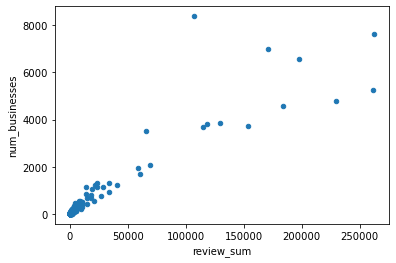

In [29]:
merged[merged['num_businesses']<9000].plot(kind='scatter', x='review_sum', y='num_businesses')

The trend is still the same, and it makes sense. The more businesses a city has, the more people it contains and thus, the higher total reviews for businesses in that city. It is not that people in some cities are less engaging.

Let's also check the star ratings given to the businesses.

<AxesSubplot:ylabel='Frequency'>

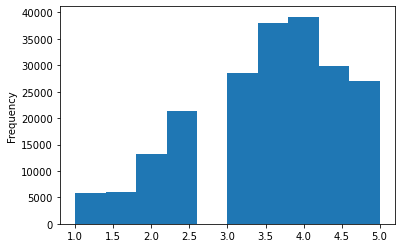

In [30]:
df['stars'].plot(kind='hist', bins=10)

In general, businesses have received 4 star ratings. Let's see how that correlates to the number of reviews.

<AxesSubplot:xlabel='review_count', ylabel='stars'>

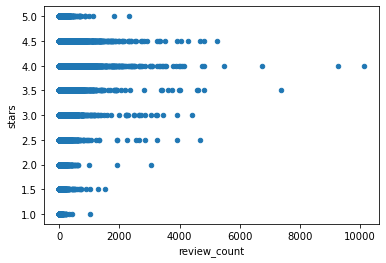

In [31]:
df.plot(kind='scatter', x='review_count', y='stars')

<AxesSubplot:xlabel='stars', ylabel='review_count'>

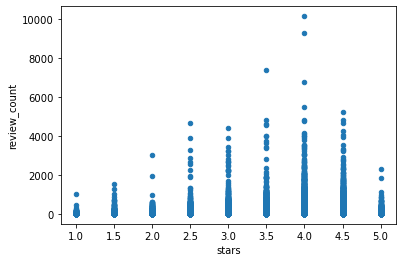

In [32]:
df.plot(kind='scatter', x='stars', y='review_count')

In general, it does not depend on how many reviews a business received. The star rating could actually reflect the general public liking of the place.

In [33]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",POINT (-80.85261 35.46272)
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None,POINT (-111.89026 33.56940)
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None,POINT (-73.58007 45.47998)
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",POINT (-115.12773 36.21973)
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",POINT (-111.72665 33.42807)


In [34]:
df['categories']

0         Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...
1         Health & Medical, Fitness & Instruction, Yoga,...
2                          Pets, Pet Services, Pet Groomers
3         Hardware Stores, Home Services, Building Suppl...
4         Home Services, Plumbing, Electricians, Handyma...
                                ...                        
209388                    Japanese, Sushi Bars, Restaurants
209389    Department Stores, Food, Mobile Phones, Fashio...
209390    American (New), Food, Burgers, Restaurants, Fa...
209391                     Pet Services, Pet Training, Pets
209392    Tax Services, Professional Services, Accountan...
Name: categories, Length: 209393, dtype: object

In [35]:
from collections import Counter
categories = Counter()
df['categories'].str.lower().str.split(', ').apply(categories.update)
print(categories)

Counter({'restaurants': 63944, 'shopping': 34644, 'food': 32991, 'home services': 22487, 'beauty & spas': 20520, 'health & medical': 19227, 'local services': 15783, 'automotive': 14720, 'nightlife': 14211, 'bars': 12400, 'event planning & services': 11263, 'active life': 10225, 'coffee & tea': 8415, 'fashion': 8374, 'fast food': 8106, 'sandwiches': 8064, 'american (traditional)': 7596, 'home & garden': 7331, 'hair salons': 7303, 'pizza': 7302, 'professional services': 6923, 'arts & entertainment': 6802, 'doctors': 6767, 'auto repair': 6657, 'real estate': 6435, 'hotels & travel': 6413, 'breakfast & brunch': 6225, 'burgers': 6107, 'nail salons': 5451, 'specialty food': 5253, 'mexican': 5207, 'american (new)': 5118, 'italian': 5012, 'fitness & instruction': 4861, 'chinese': 4746, 'pets': 4402, 'hair removal': 4375, 'bakeries': 4055, 'dentists': 3870, 'grocery': 3862, 'desserts': 3824, 'education': 3763, 'skin care': 3755, 'contractors': 3614, 'cafes': 3601, 'financial services': 3529, "w

Let us plot the 20 most frequent business categories.

In [36]:
lists = sorted(categories.items(), key=lambda item: item[1], reverse=True)
x, y = zip(*lists) 

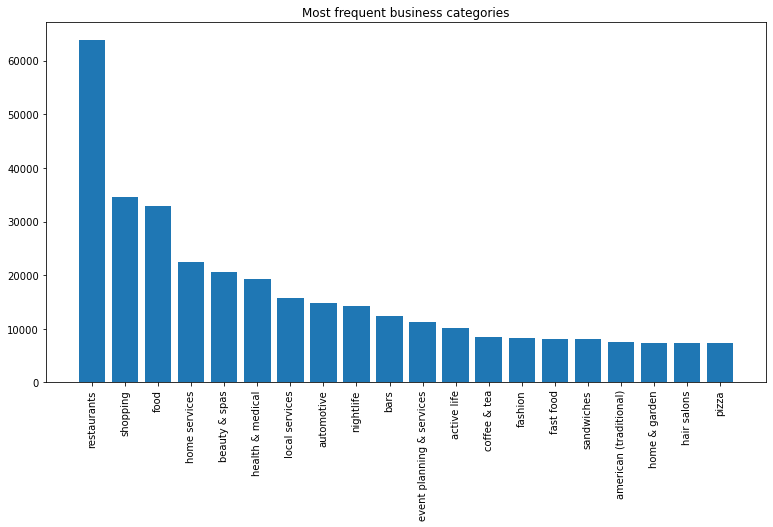

In [37]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
businesses = x[:20]
frequencies = y[:20]
ax.bar(businesses,frequencies)
plt.xticks(rotation='vertical')
plt.title('Most frequent business categories')
plt.show()

Restaurants, shopping, food and home services among others are the most frequent business categories. Let's see the average star rating these businesses receive.

In [38]:
average_stars = []
for cat in x[:20]:
    average_stars.append(df[df['categories'].str.lower().str.contains(cat, na=False)]['stars'].mean())

/opt/conda/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


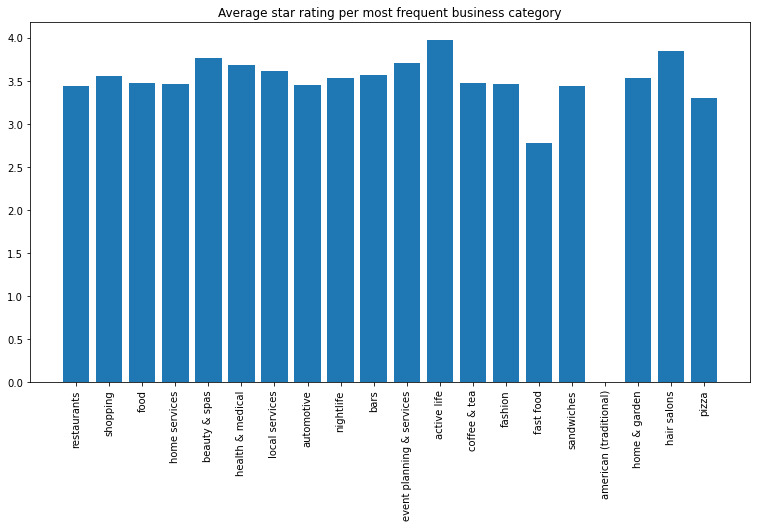

In [39]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(businesses,average_stars)
plt.xticks(rotation='vertical')
plt.title('Average star rating per most frequent business category')
plt.show()

Businesses belonging to categories such as active life, hair salons and beauty and spas are ustuall rated higher in average. Let's see the average star ratings for least frequent categories.

In [40]:
average_stars = []
for cat in x[-20:]:
    average_stars.append(df[df['categories'].str.lower().str.contains(cat, na=False)]['stars'].mean())

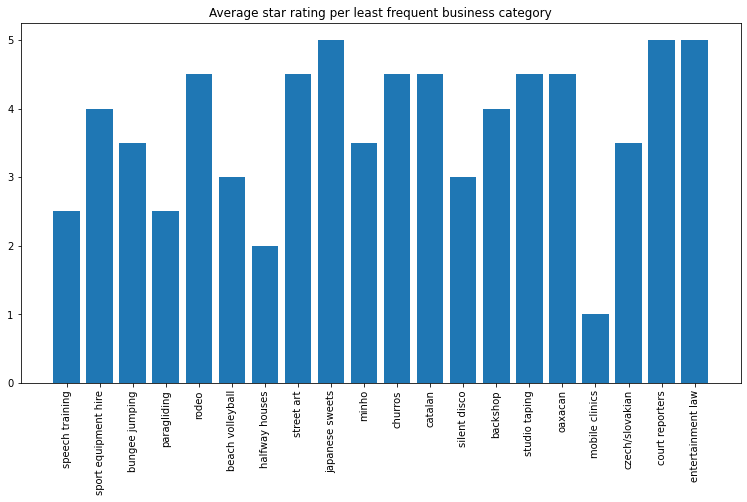

In [41]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
businesses = x[-20:]
ax.bar(businesses,average_stars)
plt.xticks(rotation='vertical')
plt.title('Average star rating per least frequent business category')
plt.show()

It seems like businesses that are rare get better ratings. Japanese sweets, court reporters and entertainment law categories are highly rated.